# **Movie Rating Prediction with Python**


**Libraries to build and evaluate machine learning model**

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Data Preparation**

In [21]:
# Load the data into dataframe caleed 'df'
df = pd.read_csv("IMDb-Movies-India-dataset.csv", encoding='ISO-8859-1')

In [22]:
# Display the dataframe
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [23]:
df.shape

(15509, 10)

**Data Cleaning**

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [25]:
# Check for missing values
df.isna().sum()

# Check for duplicate rows
df.duplicated().sum()

6

**Handling missing and duplicate values**

In [26]:
# Drop rows with missing values
df.dropna(inplace=True)

# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [27]:
# Shape of the dataframe after handling missing and duplicate values
df.shape

(5659, 10)

In [28]:
# Show dataframe info after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


**Conversion correct data types into the correct formats**

In [29]:
df['Year'] = df['Year'].str.replace(r'\(|\)', '', regex=True).astype(int)
df['Duration'] = pd.to_numeric(df['Duration'].str.replace(' min', ''))
df['Votes'] = pd.to_numeric(df['Votes'].str.replace(',', ''))

# Check the data types after coversion
df.dtypes

Name         object
Year          int32
Duration      int64
Genre        object
Rating      float64
Votes         int64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

**Exploratory Data Analysis (EDA)**

In [30]:
#Descriptive Data Analysis for all columns
df.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,5659,5659.000000,5659.000000,5659,5659.000000,5659.000000,5659,5659,5659,5659
unique,5385,NaN,NaN,376,NaN,NaN,2431,1960,2321,2556
top,Baazi,NaN,NaN,Drama,NaN,NaN,David Dhawan,Amitabh Bachchan,Rekha,Pran
freq,4,NaN,NaN,844,NaN,NaN,41,104,52,57
mean,NaN,1996.247570,133.439124,NaN,5.898533,2697.649585,NaN,NaN,NaN,NaN
std,NaN,19.741839,25.319939,NaN,1.381165,13651.503584,NaN,NaN,NaN,NaN
min,NaN,1931.000000,21.000000,NaN,1.100000,5.000000,NaN,NaN,NaN,NaN
25%,NaN,1983.000000,119.000000,NaN,5.000000,30.000000,NaN,NaN,NaN,NaN
50%,NaN,2002.000000,135.000000,NaN,6.100000,131.000000,NaN,NaN,NaN,NaN
75%,NaN,2013.000000,150.000000,NaN,6.900000,922.500000,NaN,NaN,NaN,NaN


**Data Visualization**

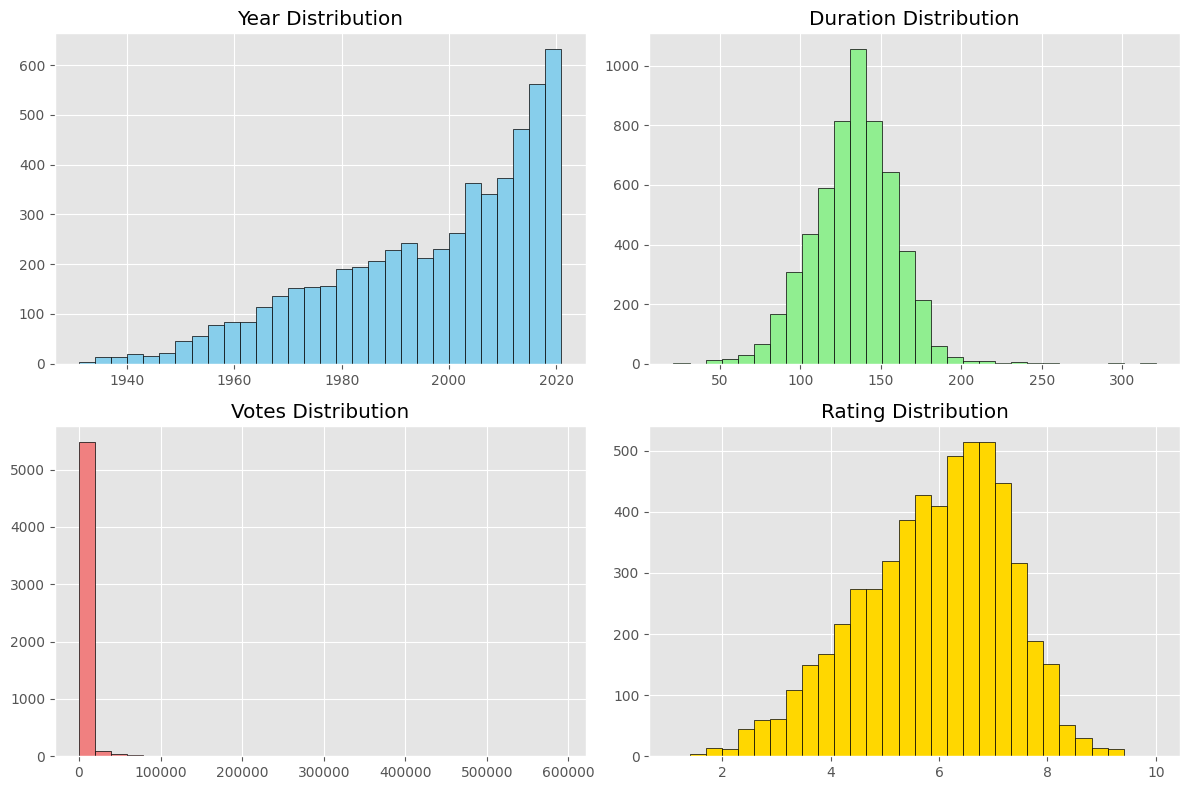

In [31]:
# Histograms for independent features
plt.style.use('ggplot')
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
df['Year'].hist(bins=30, ax=axes[0, 0], color='skyblue', edgecolor='black')
df['Duration'].hist(bins=30, ax=axes[0, 1], color='lightgreen', edgecolor='black')
df['Votes'].hist(bins=30, ax=axes[1, 0], color='lightcoral', edgecolor='black')
df['Rating'].hist(bins=30, ax=axes[1, 1], color='gold', edgecolor='black')

axes[0, 0].set_title('Year Distribution')
axes[0, 1].set_title('Duration Distribution')
axes[1, 0].set_title('Votes Distribution')
axes[1, 1].set_title('Rating Distribution')
plt.tight_layout()
plt.show()

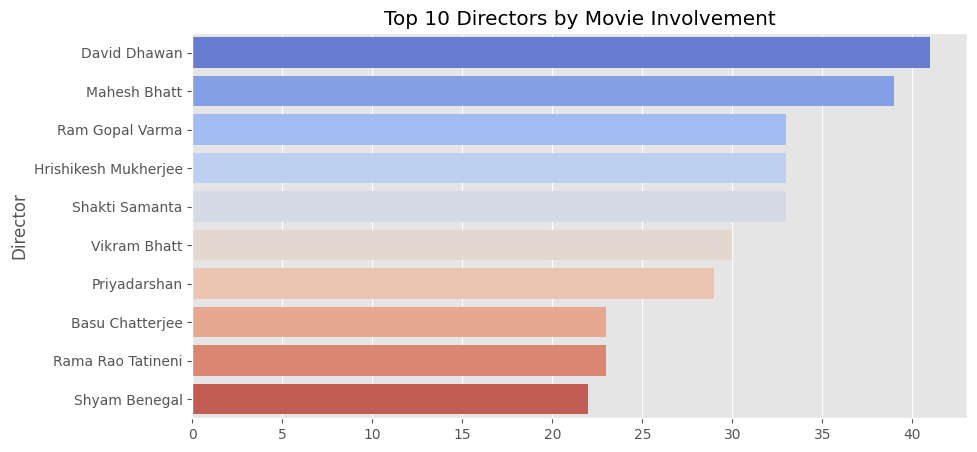

In [32]:
# Top 10 Directors
top_10_directors = df['Director'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_directors.values, y=top_10_directors.index, palette='coolwarm')
plt.title('Top 10 Directors by Movie Involvement')
plt.show()

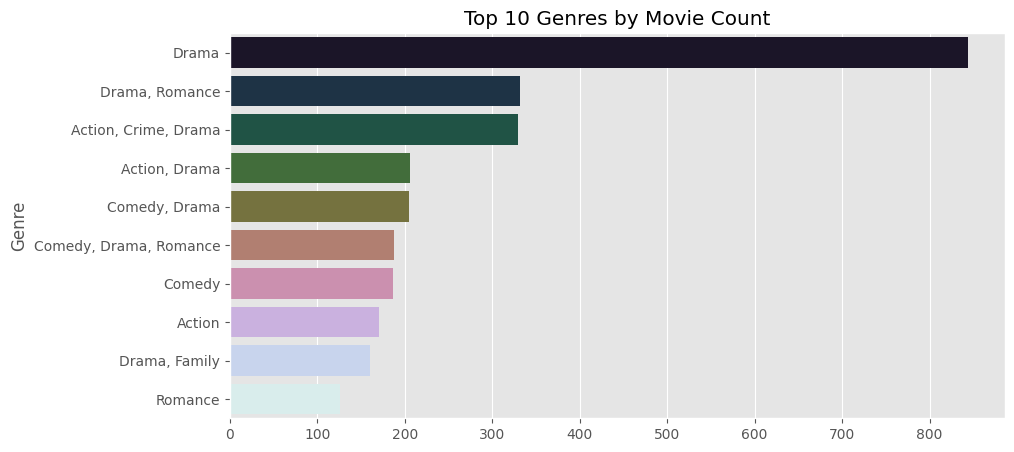

In [33]:
# Top 10 Genres
top_10_genres = df['Genre'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_genres.values, y=top_10_genres.index, palette='cubehelix')
plt.title('Top 10 Genres by Movie Count')
plt.show()

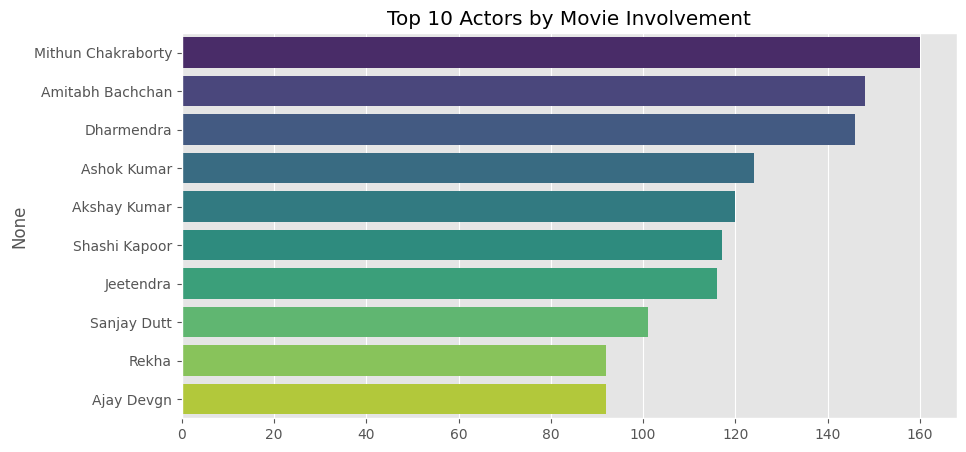

In [34]:
# Combine actors to get top 10 actors
combined_actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']])
top_10_actors = combined_actors.value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_actors.values, y=top_10_actors.index, palette='viridis')
plt.title('Top 10 Actors by Movie Involvement')
plt.show()

   Year  Average Rating
0  1931            5.75
1  1932            6.00
2  1933            6.20
3  1934            5.60
4  1935            5.70


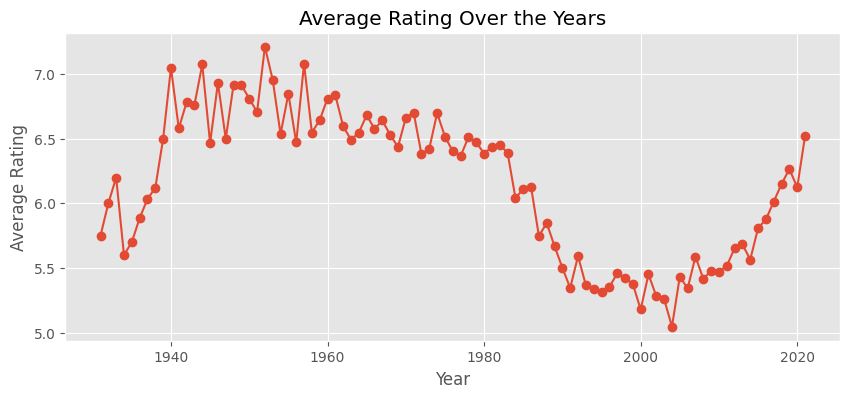

In [35]:
# Average Rating per Year
average_rating_per_year = df.groupby('Year')['Rating'].mean().reset_index()
average_rating_per_year.columns = ['Year', 'Average Rating']  # Correctly set the column names

# Check if the DataFrame is set correctly
print(average_rating_per_year.head())  # Debugging line to see the DataFrame

# Plotting
plt.figure(figsize=(10, 4))
plt.plot(average_rating_per_year['Year'], average_rating_per_year['Average Rating'], marker='o')
plt.title('Average Rating Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()


**Feature Engineering**

In [36]:
df['Genre_Average_Rating'] = df.groupby('Genre')['Rating'].transform('mean')
df['Director_Average_Rating'] = df.groupby('Director')['Rating'].transform('mean')
df['Actor1_Average_Rating'] = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor2_Average_Rating'] = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor3_Average_Rating'] = df.groupby('Actor 3')['Rating'].transform('mean')

In [37]:
# Drop unnecessary columns
df = df.drop(['Name', 'Actor 1', 'Actor 2', 'Actor 3', 'Director', 'Genre'], axis=1)

**Data Splitting**

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [39]:
# Features and Target
X = df[['Year', 'Votes', 'Duration', 'Genre_Average_Rating', 'Director_Average_Rating', 'Actor1_Average_Rating', 'Actor2_Average_Rating', 'Actor3_Average_Rating']]
y = df['Rating']

In [40]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Model Building**

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


>**Linear Regression**

In [43]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)


>**Random Forest Regressor**

In [44]:

rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

>**Gradient Boosting Regressor**

In [45]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)


**Model Evaluation**

In [46]:

def evaluate_model(model_name, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R2 Score: {r2:.4f}\n")

evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("Gradient Boosting", y_test, y_pred_gb)

Model: Linear Regression
Mean Squared Error: 0.4245
Mean Absolute Error: 0.4826
R2 Score: 0.7707

Model: Random Forest
Mean Squared Error: 0.3527
Mean Absolute Error: 0.4087
R2 Score: 0.8096

Model: Gradient Boosting
Mean Squared Error: 0.3448
Mean Absolute Error: 0.4247
R2 Score: 0.8138



**Plot Actual vs Predicted**

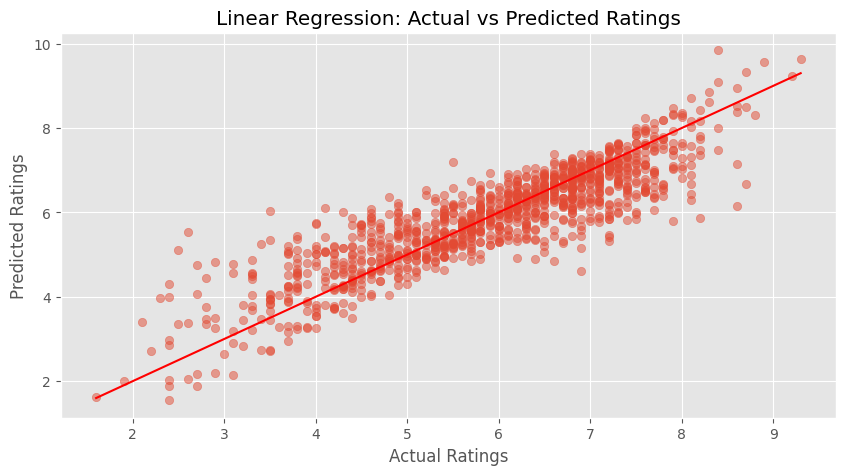

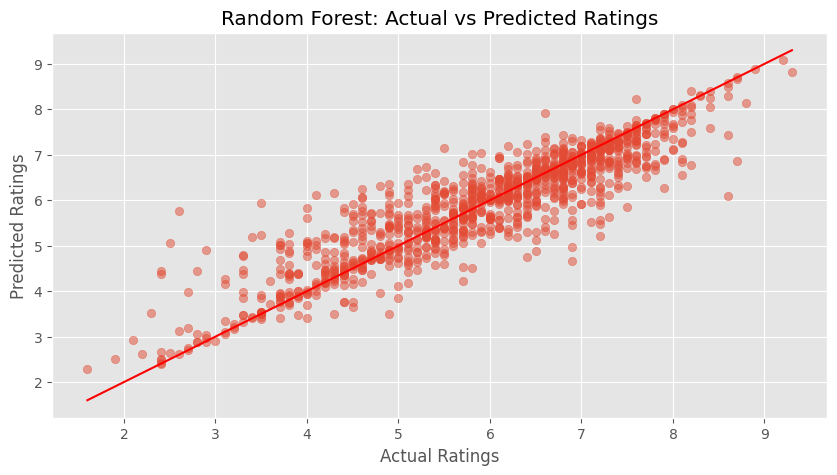

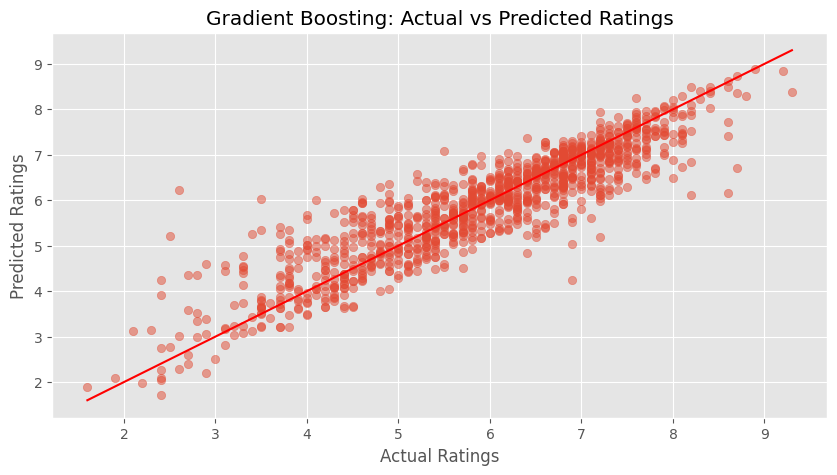

In [47]:
def plot_actual_vs_predicted(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
    plt.title(f'{model_name}: Actual vs Predicted Ratings')
    plt.xlabel('Actual Ratings')
    plt.ylabel('Predicted Ratings')
    plt.grid(True)
    plt.show()

plot_actual_vs_predicted(y_test, y_pred_lr, "Linear Regression")
plot_actual_vs_predicted(y_test, y_pred_rf, "Random Forest")
plot_actual_vs_predicted(y_test, y_pred_gb, "Gradient Boosting")


**Model Testing with new data**

In [48]:
test_data = {'Year': [2022], 'Votes': [500], 'Duration': [150], 'Genre_Average_Rating': [6.5],
             'Director_Average_Rating': [7.0], 'Actor1_Average_Rating': [6.2], 'Actor2_Average_Rating': [6.3], 'Actor3_Average_Rating': [6.1]}
test_df = pd.DataFrame(test_data)
test_scaled = scaler.transform(test_df)
predicted_rating = rf_model.predict(test_scaled)
print(f'Predicted Rating for test data: {predicted_rating[0]:.2f}')

Predicted Rating for test data: 6.61
